## Clean data

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("RawData.csv")
df

C:\Users\DUC VAN\AppData\Local\Temp\ipykernel_15164\1498686140.py:1: DtypeWarning: Columns (3,5,8,31,32,34,35,37,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("RawData.csv")


,ID,List ID,Posted Time,Status,Transaction Type,Seller Name,Seller ID,Region (Code),Region Name,Category,...,Width (Text),Ad ID,State,Floors,Rooms,Toilets,Furnishing Sell,District,District Name,House Type
0,154269561,113584228,31/01/2025,accepted,s,Khang anh,24585559.0,3,Đà Nẵng,1040,...,Ngang 4 m,0,0,0.0,0.0,0.0,0.0,quận liên chiểu,Quận Liên Chiểu,NaN
1,164081534,122031985,07/02/2025,accepted,s,Minh trí,12588075.0,3,Đà Nẵng,1040,...,Ngang 5 m,0,0,0.0,0.0,0.0,0.0,quận liên chiểu,Quận Liên Chiểu,NaN
2,156854814,115807159,31/01/2025,accepted,s,Khang anh,24585559.0,3,Đà Nẵng,1040,...,Ngang 10 m,0,0,0.0,0.0,0.0,0.0,quận liên chiểu,Quận Liên Chiểu,NaN
3,163242245,121308677,31/01/2025,accepted,s,Khang anh,24585559.0,3,Đà Nẵng,1040,...,Ngang 5 m,0,0,0.0,0.0,0.0,0.0,quận cẩm lệ,Quận Cẩm Lệ,NaN
4,162985943,121088552,01/02/2025,accepted,s,Khang anh,4483578.0,3,Đà Nẵng,1040,...,Ngang 5 m,0,0,0.0,0.0,0.0,0.0,quận liên chiểu,Quận Liên Chiểu,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33265,0,124286933,29/04/2025,0,s,NaN,NaN,0,0,1020,...,NaN,166697374,accepted,NaN,3.0,NaN,NaN,NaN,Quận Hải Châu,NaN
33266,0,124451292,29/04/2025,0,s,NaN,NaN,0,0,1020,...,NaN,166887660,accepted,NaN,11.0,7.0,1.0,NaN,Quận Hải Châu,NaN
33267,0,124666527,30/04/2025,0,s,NaN,NaN,0,0,1020,...,NaN,167135500,accepted,1.0,2.0,2.0,2.0,NaN,Quận Sơn Trà,NaN
33268,0,124709142,03/05/2025,0,s,NaN,NaN,0,0,1020,...,NaN,167186967,accepted,4.0,4.0,7.0,1.0,NaN,Quận Sơn Trà,NaN


In [37]:
df = df[
    [
        "Posted Time","Longitude","Latitude", "Category Name", "Ward Name", "District Name",
        "Street Name", "Area", "Width", "Length", "Land Type",
        "Legal Status", "House Direction", "Property Features",
        "Floors", "Rooms", "Toilets", "Furnishing Sell", "Price per m²"
    ]
]

df_initial = df.copy()
df

,Posted Time,Longitude,Latitude,Category Name,Ward Name,District Name,Street Name,Area,Width,Length,Land Type,Legal Status,House Direction,Property Features,Floors,Rooms,Toilets,Furnishing Sell,Price per m²
0,31/01/2025,108.169500,16.065700,Đất,Phường Hòa Minh,Quận Liên Chiểu,Thanh vinh 15,100.0,4.0000,25.00,4,6.0,5.0,2; 4,0.0,0.0,0.0,0.0,1.500000
1,07/02/2025,108.158270,16.053888,Đất,Phường Hòa Khánh Nam,Quận Liên Chiểu,Đường Hoàng Văn Thái,102.0,5.0000,23.00,4,6.0,8.0,3,0.0,0.0,0.0,0.0,1.617647
2,31/01/2025,108.150700,16.058900,Đất,Phường Hòa Khánh Nam,Quận Liên Chiểu,Đường Đà Sơn,150.0,10.0000,15.00,4,6.0,6.0,2; 3; 4,0.0,0.0,0.0,0.0,1.666667
3,31/01/2025,108.172516,16.028736,Đất,Phường Hòa Phát,Quận Cẩm Lệ,Vũ lăng,100.0,5.0000,20.00,4,5.0,6.0,4; 2; 3,0.0,0.0,0.0,0.0,2.500000
4,01/02/2025,108.136940,16.077059,Đất,Phường Hòa Khánh Bắc,Quận Liên Chiểu,Âu cơ,100.0,5.0000,20.00,4,5.0,4.0,4; 2,0.0,0.0,0.0,0.0,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33265,29/04/2025,108.223590,16.065569,Nhà ở,Phường Phước Ninh,Quận Hải Châu,Đường Trần Phú,88.0,NaN,NaN,0,1.0,NaN,0,NaN,3.0,NaN,NaN,306.818180
33266,29/04/2025,108.221920,16.039656,Nhà ở,Phường Hòa Cường Nam,Quận Hải Châu,Đường Núi Thành,145.1,4.4200,19.76,0,1.0,1.0,0,NaN,11.0,7.0,1.0,189.524460
33267,30/04/2025,108.240190,16.054504,Nhà ở,Phường An Hải Đông,Quận Sơn Trà,Đường Nguyễn Văn Thoại,134.0,6.3298,21.10,0,1.0,6.0,0,1.0,2.0,2.0,2.0,231.343280
33268,03/05/2025,108.241050,16.074509,Nhà ở,Phường An Hải Bắc,Quận Sơn Trà,Đường Lê Tân Toán,235.8,13.0000,NaN,0,1.0,3.0,0,4.0,4.0,7.0,1.0,139.949110


In [38]:
df.rename(columns={"Price per m²": "Price per m2"}, inplace=True)

C:\Users\DUC VAN\AppData\Local\Temp\ipykernel_15164\973838445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"Price per m²": "Price per m2"}, inplace=True)


### Handling missing data

#### Lost data statistics

In [39]:
print(df.isnull().sum())

Posted Time              0
Longitude                0
Latitude                 0
Category Name            0
Ward Name                3
District Name          487
Street Name              1
Area                     1
Width                 7547
Length               12221
Land Type                0
Legal Status             1
House Direction      14512
Property Features     5144
Floors                5267
Rooms                    1
Toilets               3749
Furnishing Sell       7408
Price per m2             1
dtype: int64


In [40]:
numeric_cols = df.select_dtypes(include='number').columns

check_only_less_than_zero = ['Floors', 'Rooms', 'Toilets', 'Furnishing Sell', 'Land Type']

for col in numeric_cols:
    if col in check_only_less_than_zero:
        invalid_mask = df[col] < 0
        condition = "< 0"
    else:
        invalid_mask = df[col] <= 0
        condition = "<= 0"
    
    invalid_count = invalid_mask.sum()
    
    if invalid_count > 0:
        print(f"Column '{col}' has {invalid_count} invalid value(s) (condition: {condition})")
    else:
        print(f"Column '{col}' has no invalid values (condition: {condition})")


Column 'Longitude' has 7 invalid value(s) (condition: <= 0)
Column 'Latitude' has 7 invalid value(s) (condition: <= 0)
Column 'Area' has no invalid values (condition: <= 0)
Column 'Width' has no invalid values (condition: <= 0)
Column 'Length' has no invalid values (condition: <= 0)
Column 'Land Type' has no invalid values (condition: < 0)
Column 'Legal Status' has no invalid values (condition: <= 0)
Column 'House Direction' has no invalid values (condition: <= 0)
Column 'Floors' has no invalid values (condition: < 0)
Column 'Rooms' has no invalid values (condition: < 0)
Column 'Toilets' has no invalid values (condition: < 0)
Column 'Furnishing Sell' has no invalid values (condition: < 0)
Column 'Price per m2' has no invalid values (condition: <= 0)


In [41]:
# Đếm số giá trị trống theo từng hàng
missing_per_row = df.isnull().sum(axis=1)

# Đếm số lượng hàng tương ứng với mỗi số lượng giá trị trống
missing_summary = missing_per_row.value_counts().sort_index()

# Hiển thị kết quả
print("Number of rows by count of missing values:")
for missing_count, row_count in missing_summary.items():
    print(f"{row_count} row(s) with {missing_count} missing value(s)")

Number of rows by count of missing values:
11455 row(s) with 0 missing value(s)
7745 row(s) with 1 missing value(s)
4532 row(s) with 2 missing value(s)
3654 row(s) with 3 missing value(s)
2853 row(s) with 4 missing value(s)
1032 row(s) with 5 missing value(s)
1997 row(s) with 6 missing value(s)
1 row(s) with 7 missing value(s)
1 row(s) with 11 missing value(s)


In [42]:
df_cleaned = df[df.isnull().sum(axis=1) < 3]

print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

Original shape: (33270, 19)
Cleaned shape: (23732, 19)


In [43]:
df_cleaned.dropna(subset=["Ward Name"], inplace=True)
df_cleaned.dropna(subset=["District Name"], inplace=True)
df_cleaned.dropna(subset=["Area"], inplace=True)
df_cleaned.dropna(subset=["Price per m2"], inplace=True)
df_cleaned.dropna(subset=["Rooms"], inplace=True)

C:\Users\DUC VAN\AppData\Local\Temp\ipykernel_15164\259625223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(subset=["Ward Name"], inplace=True)
C:\Users\DUC VAN\AppData\Local\Temp\ipykernel_15164\259625223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(subset=["District Name"], inplace=True)
C:\Users\DUC VAN\AppData\Local\Temp\ipykernel_15164\259625223.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [44]:
print(df_cleaned.isnull().sum())
df=df_cleaned.copy()

Posted Time             0
Longitude               0
Latitude                0
Category Name           0
Ward Name               0
District Name           0
Street Name             0
Area                    0
Width                 741
Length               3627
Land Type               0
Legal Status            0
House Direction      5979
Property Features    2845
Floors                843
Rooms                   0
Toilets               311
Furnishing Sell      2045
Price per m2            0
dtype: int64


#### For the Width and Length variables

*After the statistics we know that the area data is complete, then check if there is width but no length or vice versa, then use the area calculation formula. If both features are empty, the default is 5 for width and 5 for length*

In [45]:
# If Length is empty but Width exists, then calculate Length
df.loc[df["Length"].isna() & df["Width"].notna(), "Length"] = (
df["Area"] / df["Width"]
)

# If Width is empty but Length exists, then calculate Width
df.loc[df["Width"].isna() & df["Length"].notna(), "Width"] = (
df["Area"] / df["Length"]
)

# If both Width and Length are empty, set Width = 5 and calculate Length
missing_indexes = df[df["Width"].isna() & df["Length"].isna()].index
df.loc[missing_indexes, "Length"] = df.loc[missing_indexes, "Area"] / 5
df.loc[missing_indexes, "Width"] = 5

In [46]:
before_count = (df_initial["Width"].dropna().clip(0, 100) == 5).sum()
after_count = (df["Width"].dropna().clip(0, 100) == 5).sum()

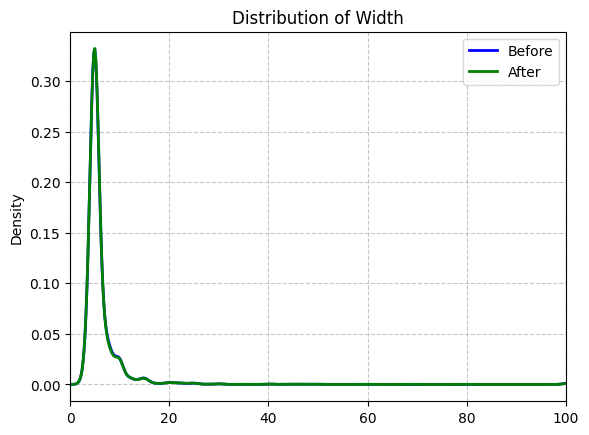

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_initial["Width"].dropna().clip(0, 100).plot(kind='kde', ax=ax, color='blue', label="Before", linewidth=2)
df["Width"].dropna().clip(0, 100).plot(kind='kde', ax=ax, color='green', label="After", linewidth=2)
ax.set_xlim(0, 100)
ax.grid(True, linestyle="--", alpha=0.7)
ax.legend(loc='best')
ax.set_title("Distribution of Width")
plt.show()

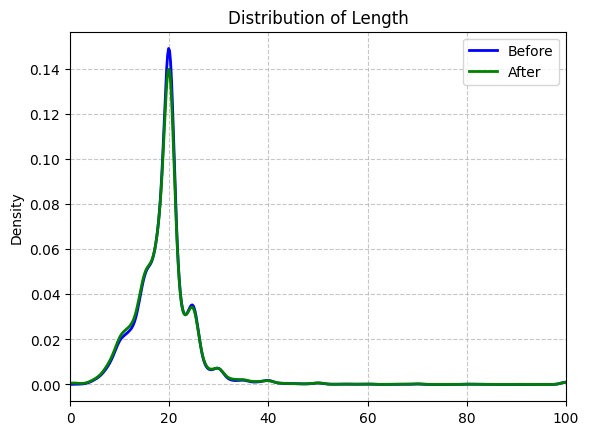

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_initial["Length"].dropna().clip(0, 100).plot(kind='kde', ax=ax, color='blue', label="Before", linewidth=2)
df["Length"].dropna().clip(0, 100).plot(kind='kde', ax=ax, color='green', label="After", linewidth=2)
ax.set_xlim(0, 100)
ax.grid(True, linestyle="--", alpha=0.7)
ax.legend(loc='best')
ax.set_title("Distribution of Length")
plt.show()

In [49]:
def replace_invalid_house_direction(direction):
    if pd.isna(direction):
        return random.randint(1, 8)
    return direction  

df["House Direction"] = df["House Direction"].apply(replace_invalid_house_direction)

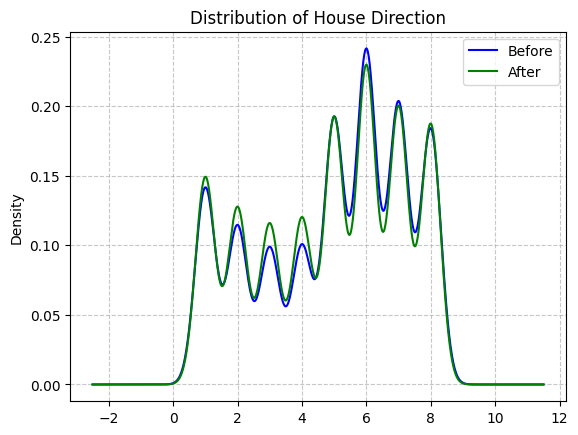

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_initial["House Direction"].dropna().plot(kind='kde', ax=ax, color='blue', label="Before")
df["House Direction"].dropna().plot(kind='kde', ax=ax, color='green', label="After")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.grid(True, linestyle="--", alpha=0.7)
ax.set_title("Distribution of House Direction")
plt.show()


In [51]:
df.loc[(df["Land Type"] == 1) & (df["Property Features"].isna()), "Property Features"] = "3"
df.loc[(df["Land Type"] != 1) & (df["Property Features"].isna()), "Property Features"] = "4"
df

,Posted Time,Longitude,Latitude,Category Name,Ward Name,District Name,Street Name,Area,Width,Length,Land Type,Legal Status,House Direction,Property Features,Floors,Rooms,Toilets,Furnishing Sell,Price per m2
0,31/01/2025,108.169500,16.065700,Đất,Phường Hòa Minh,Quận Liên Chiểu,Thanh vinh 15,100.0,4.0000,25.000000,4,6.0,5.0,2; 4,0.0,0.0,0.0,0.0,1.500000
1,07/02/2025,108.158270,16.053888,Đất,Phường Hòa Khánh Nam,Quận Liên Chiểu,Đường Hoàng Văn Thái,102.0,5.0000,23.000000,4,6.0,8.0,3,0.0,0.0,0.0,0.0,1.617647
2,31/01/2025,108.150700,16.058900,Đất,Phường Hòa Khánh Nam,Quận Liên Chiểu,Đường Đà Sơn,150.0,10.0000,15.000000,4,6.0,6.0,2; 3; 4,0.0,0.0,0.0,0.0,1.666667
3,31/01/2025,108.172516,16.028736,Đất,Phường Hòa Phát,Quận Cẩm Lệ,Vũ lăng,100.0,5.0000,20.000000,4,5.0,6.0,4; 2; 3,0.0,0.0,0.0,0.0,2.500000
4,01/02/2025,108.136940,16.077059,Đất,Phường Hòa Khánh Bắc,Quận Liên Chiểu,Âu cơ,100.0,5.0000,20.000000,4,5.0,4.0,4; 2,0.0,0.0,0.0,0.0,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33264,08/05/2025,108.211280,16.060003,Nhà ở,Phường Vĩnh Trung,Quận Thanh Khê,Đường Nguyễn Văn Linh,103.0,4.4299,23.251089,0,1.0,4.0,0,3.0,3.0,3.0,3.0,257.281560
33266,29/04/2025,108.221920,16.039656,Nhà ở,Phường Hòa Cường Nam,Quận Hải Châu,Đường Núi Thành,145.1,4.4200,19.760000,0,1.0,1.0,0,NaN,11.0,7.0,1.0,189.524460
33267,30/04/2025,108.240190,16.054504,Nhà ở,Phường An Hải Đông,Quận Sơn Trà,Đường Nguyễn Văn Thoại,134.0,6.3298,21.100000,0,1.0,6.0,0,1.0,2.0,2.0,2.0,231.343280
33268,03/05/2025,108.241050,16.074509,Nhà ở,Phường An Hải Bắc,Quận Sơn Trà,Đường Lê Tân Toán,235.8,13.0000,18.138462,0,1.0,3.0,0,4.0,4.0,7.0,1.0,139.949110


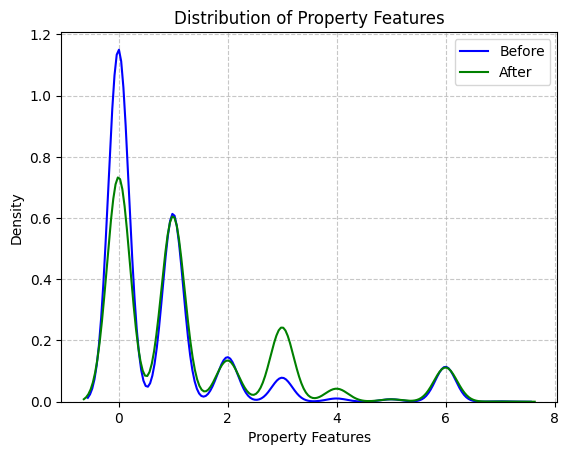

In [52]:
# Convert the 'Property Features' column into a list
df_initial["Property Features"] = df_initial["Property Features"].astype(str).str.split(";")
df["Property Features"] = df["Property Features"].astype(str).str.split(";")

# Expand each value in the array into separate rows
df_initial_exploded = df_initial.explode("Property Features")
df_exploded = df.explode("Property Features")

# Convert values to numeric type
df_initial_exploded["Property Features"] = pd.to_numeric(df_initial_exploded["Property Features"], errors="coerce")
df_exploded["Property Features"] = pd.to_numeric(df_exploded["Property Features"], errors="coerce")

# Plot KDE
fig = plt.figure()
ax = fig.add_subplot(111)

sns.kdeplot(df_initial_exploded["Property Features"].dropna(), ax=ax, color='blue', label="Before")
sns.kdeplot(df_exploded["Property Features"].dropna(), ax=ax, color='green', label="After")
ax.grid(True, linestyle="--", alpha=0.7)
ax.legend()
ax.set_title("Distribution of Property Features")
plt.show()


In [53]:
feature_mapping = {
    0: "No thing",
    1: "Frontage",
    2: "Back Expansion",
    3: "1 Part Residential",
    4: "No Residential",
    5: "Car Alley",
    6: "No Residential",
    7: "All Residential"
}

df["Property Features"] = df["Property Features"].apply(lambda x: [feature_mapping[int(num)] for num in x])
df.head()

,Posted Time,Longitude,Latitude,Category Name,Ward Name,District Name,Street Name,Area,Width,Length,Land Type,Legal Status,House Direction,Property Features,Floors,Rooms,Toilets,Furnishing Sell,Price per m2
0,31/01/2025,108.169500,16.065700,Đất,Phường Hòa Minh,Quận Liên Chiểu,Thanh vinh 15,100.0,4.0,25.0,4,6.0,5.0,"[Back Expansion, No Residential]",0.0,0.0,0.0,0.0,1.500000
1,07/02/2025,108.158270,16.053888,Đất,Phường Hòa Khánh Nam,Quận Liên Chiểu,Đường Hoàng Văn Thái,102.0,5.0,23.0,4,6.0,8.0,[1 Part Residential],0.0,0.0,0.0,0.0,1.617647
2,31/01/2025,108.150700,16.058900,Đất,Phường Hòa Khánh Nam,Quận Liên Chiểu,Đường Đà Sơn,150.0,10.0,15.0,4,6.0,6.0,"[Back Expansion, 1 Part Residential, No Reside...",0.0,0.0,0.0,0.0,1.666667
3,31/01/2025,108.172516,16.028736,Đất,Phường Hòa Phát,Quận Cẩm Lệ,Vũ lăng,100.0,5.0,20.0,4,5.0,6.0,"[No Residential, Back Expansion, 1 Part Reside...",0.0,0.0,0.0,0.0,2.500000
4,01/02/2025,108.136940,16.077059,Đất,Phường Hòa Khánh Bắc,Quận Liên Chiểu,Âu cơ,100.0,5.0,20.0,4,5.0,4.0,"[No Residential, Back Expansion]",0.0,0.0,0.0,0.0,2.500000


In [54]:
df['Floors'] = df.apply(lambda row: np.floor((row['Rooms'] - 1) / 2) + 1 if pd.isnull(row['Floors']) else row['Floors'], axis=1)

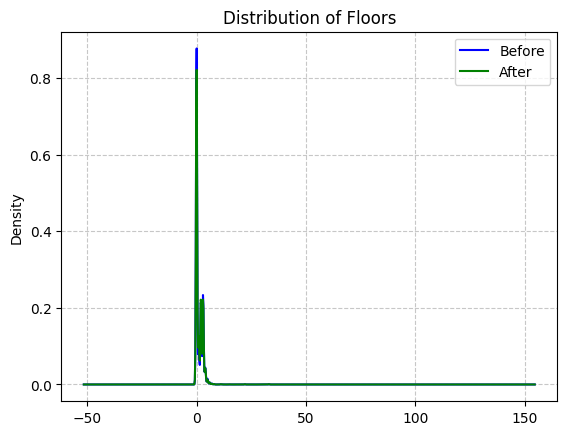

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_initial["Floors"].dropna().plot(kind='kde', ax=ax, color='blue', label="Before")
df["Floors"].dropna().plot(kind='kde', ax=ax, color='green', label="After")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.grid(True, linestyle="--", alpha=0.7)
ax.set_title("Distribution of Floors")
plt.show()


In [56]:
df['Toilets'] = df.apply(lambda row: row['Floors'] if pd.isna(row['Toilets']) else row['Toilets'], axis=1)

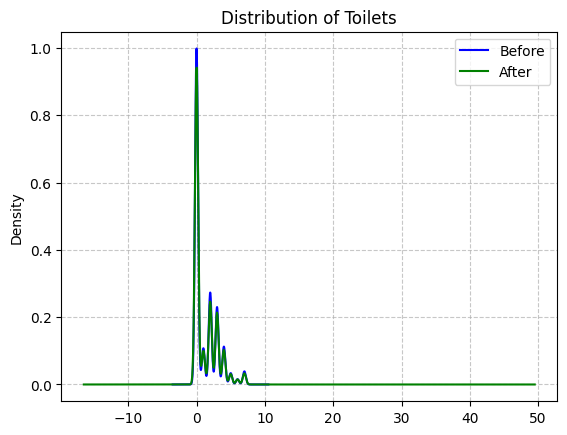

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_initial["Toilets"].dropna().plot(kind='kde', ax=ax, color='blue', label="Before")
df["Toilets"].dropna().plot(kind='kde', ax=ax, color='green', label="After")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.grid(True, linestyle="--", alpha=0.7)
ax.set_title("Distribution of Toilets")
plt.show()

In [58]:
df["Furnishing Sell"] = df["Furnishing Sell"].apply(lambda x: np.random.randint(0, 3) if pd.isna(x) else x)

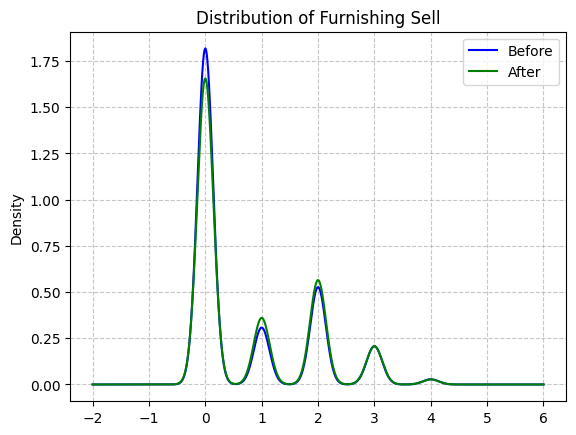

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_initial["Furnishing Sell"].dropna().plot(kind='kde', ax=ax, color='blue', label="Before")
df["Furnishing Sell"].dropna().plot(kind='kde', ax=ax, color='green', label="After")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.grid(True, linestyle="--", alpha=0.7)
ax.set_title("Distribution of Furnishing Sell")
plt.show()

In [60]:
print(df.isnull().sum())

Posted Time          0
Longitude            0
Latitude             0
Category Name        0
Ward Name            0
District Name        0
Street Name          0
Area                 0
Width                0
Length               0
Land Type            0
Legal Status         0
House Direction      0
Property Features    0
Floors               0
Rooms                0
Toilets              0
Furnishing Sell      0
Price per m2         0
dtype: int64


In [61]:
df_land = df[df["Category Name"] == "Đất"]
df_land = df_land.drop(columns=["Category Name"]) 
df_land

,Posted Time,Longitude,Latitude,Ward Name,District Name,Street Name,Area,Width,Length,Land Type,Legal Status,House Direction,Property Features,Floors,Rooms,Toilets,Furnishing Sell,Price per m2
0,31/01/2025,108.169500,16.065700,Phường Hòa Minh,Quận Liên Chiểu,Thanh vinh 15,100.0,4.0,25.00000,4,6.0,5.0,"[Back Expansion, No Residential]",0.0,0.0,0.0,0.0,1.500000
1,07/02/2025,108.158270,16.053888,Phường Hòa Khánh Nam,Quận Liên Chiểu,Đường Hoàng Văn Thái,102.0,5.0,23.00000,4,6.0,8.0,[1 Part Residential],0.0,0.0,0.0,0.0,1.617647
2,31/01/2025,108.150700,16.058900,Phường Hòa Khánh Nam,Quận Liên Chiểu,Đường Đà Sơn,150.0,10.0,15.00000,4,6.0,6.0,"[Back Expansion, 1 Part Residential, No Reside...",0.0,0.0,0.0,0.0,1.666667
3,31/01/2025,108.172516,16.028736,Phường Hòa Phát,Quận Cẩm Lệ,Vũ lăng,100.0,5.0,20.00000,4,5.0,6.0,"[No Residential, Back Expansion, 1 Part Reside...",0.0,0.0,0.0,0.0,2.500000
4,01/02/2025,108.136940,16.077059,Phường Hòa Khánh Bắc,Quận Liên Chiểu,Âu cơ,100.0,5.0,20.00000,4,5.0,4.0,"[No Residential, Back Expansion]",0.0,0.0,0.0,0.0,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31164,29/04/2025,108.243730,16.079065,Phường Phước Mỹ,Quận Sơn Trà,Đường Trần Đình Đàn,375.0,12.5,30.00000,1,1.0,5.0,[Frontage],0.0,0.0,0.0,0.0,120.000000
31165,29/04/2025,108.234790,16.076984,Phường An Hải Bắc,Quận Sơn Trà,Lê Văn Quý & An Đồn 6,383.0,23.0,24.00000,1,1.0,6.0,"[Frontage, No Residential]",0.0,0.0,0.0,0.0,151.436040
31166,28/04/2025,108.227745,16.045444,Phường Hòa Cường Bắc,Quận Hải Châu,Đường Đảo Xanh 6,400.0,16.0,25.00000,1,1.0,1.0,[1 Part Residential],0.0,0.0,0.0,0.0,162.500000
31167,02/05/2025,108.228905,16.072176,Phường An Hải Bắc,Quận Sơn Trà,Đường Trần Hưng Đạo,375.0,15.0,25.00000,1,1.0,2.0,[Frontage],0.0,0.0,0.0,0.0,205.333330


In [62]:
df_land_avg = df_land.groupby(["Posted Time", "Street Name", "Ward Name", "District Name"], as_index=False)["Price per m2"].mean()
df_land_avg

,Posted Time,Street Name,Ward Name,District Name,Price per m2
0,01/01/2025,Bầu Trảng,Phường Thanh Khê Tây,Quận Thanh Khê,32.80702
1,01/01/2025,Diệp Minh Châu,Phường Hòa Xuân,Quận Cẩm Lệ,38.90000
2,01/01/2025,Dự án Golden Hill,Phường Hòa Hiệp Nam,Quận Liên Chiểu,26.40000
3,01/01/2025,Hòa Hải,Phường Hoà Hải,Quận Ngũ Hành Sơn,38.88889
4,01/01/2025,Hòa Quý,Phường Hoà Quý,Quận Ngũ Hành Sơn,56.50000
...,...,...,...,...,...
13047,31/12/2024,Đường Tôn Đản,Phường Hòa Thọ Tây,Quận Cẩm Lệ,26.50000
13048,31/12/2024,Đường Tú Quỳ,Phường Hòa Minh,Quận Liên Chiểu,31.70000
13049,31/12/2024,Đường số 5,Phường Hòa Hiệp Nam,Quận Liên Chiểu,27.20000
13050,31/12/2024,Đường Đà Sơn,Phường Hòa Khánh Nam,Quận Liên Chiểu,26.58763


### Exceptional data processing (outliers)

In [63]:
df = df[df["Price per m2"] >= 2].copy()
print("Đã loại bỏ các dòng có đơn giá dưới 2 triệu đồng/m².")

Đã loại bỏ các dòng có đơn giá dưới 2 triệu đồng/m².


In [64]:
df_noOutliers = df.copy()

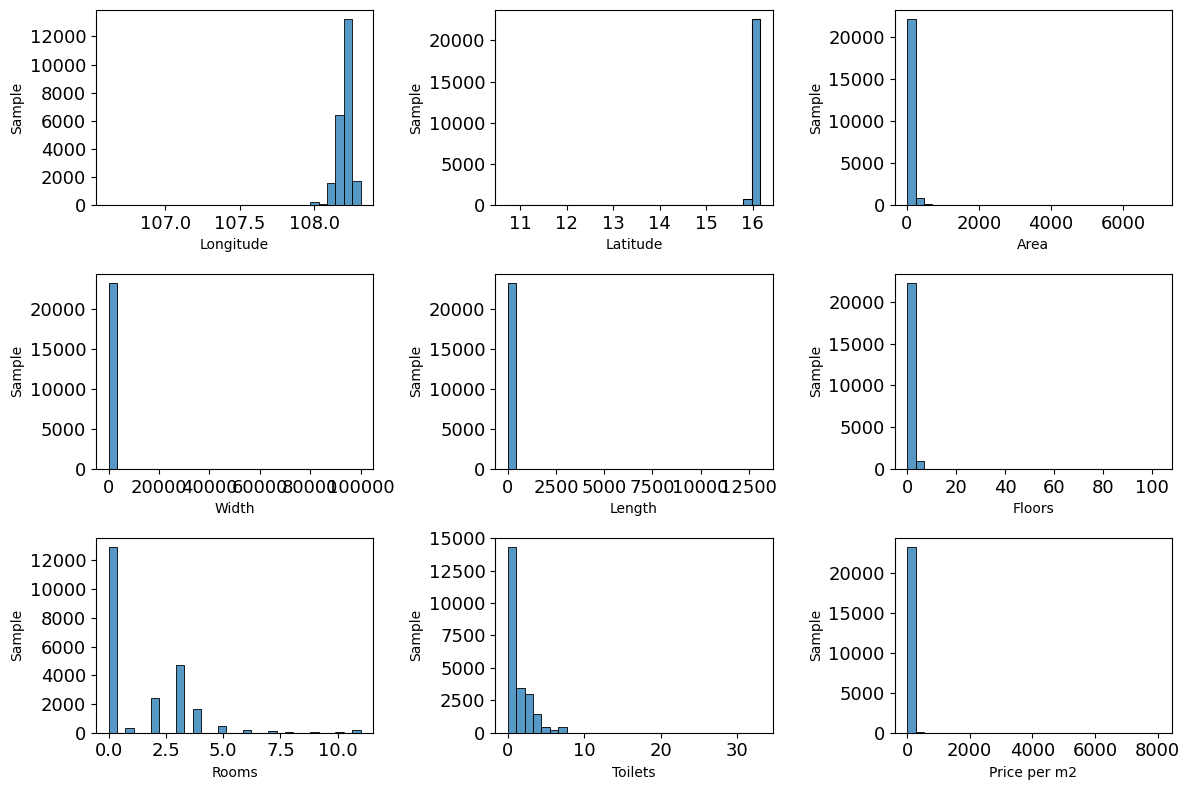

In [65]:
numerical_columns = ["Longitude","Latitude", "Area", "Width", "Length", "Floors", "Rooms", "Toilets", "Price per m2"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, bins=30)
    plt.ylabel('Sample')
    plt.xlabel(col)
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()


In [66]:
cols = ["Longitude","Latitude", "Area", "Width", "Length", "Floors", "Rooms", "Toilets", "Price per m2"]

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 3 * iqr
    lower_bound = q1 - 3 * iqr

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

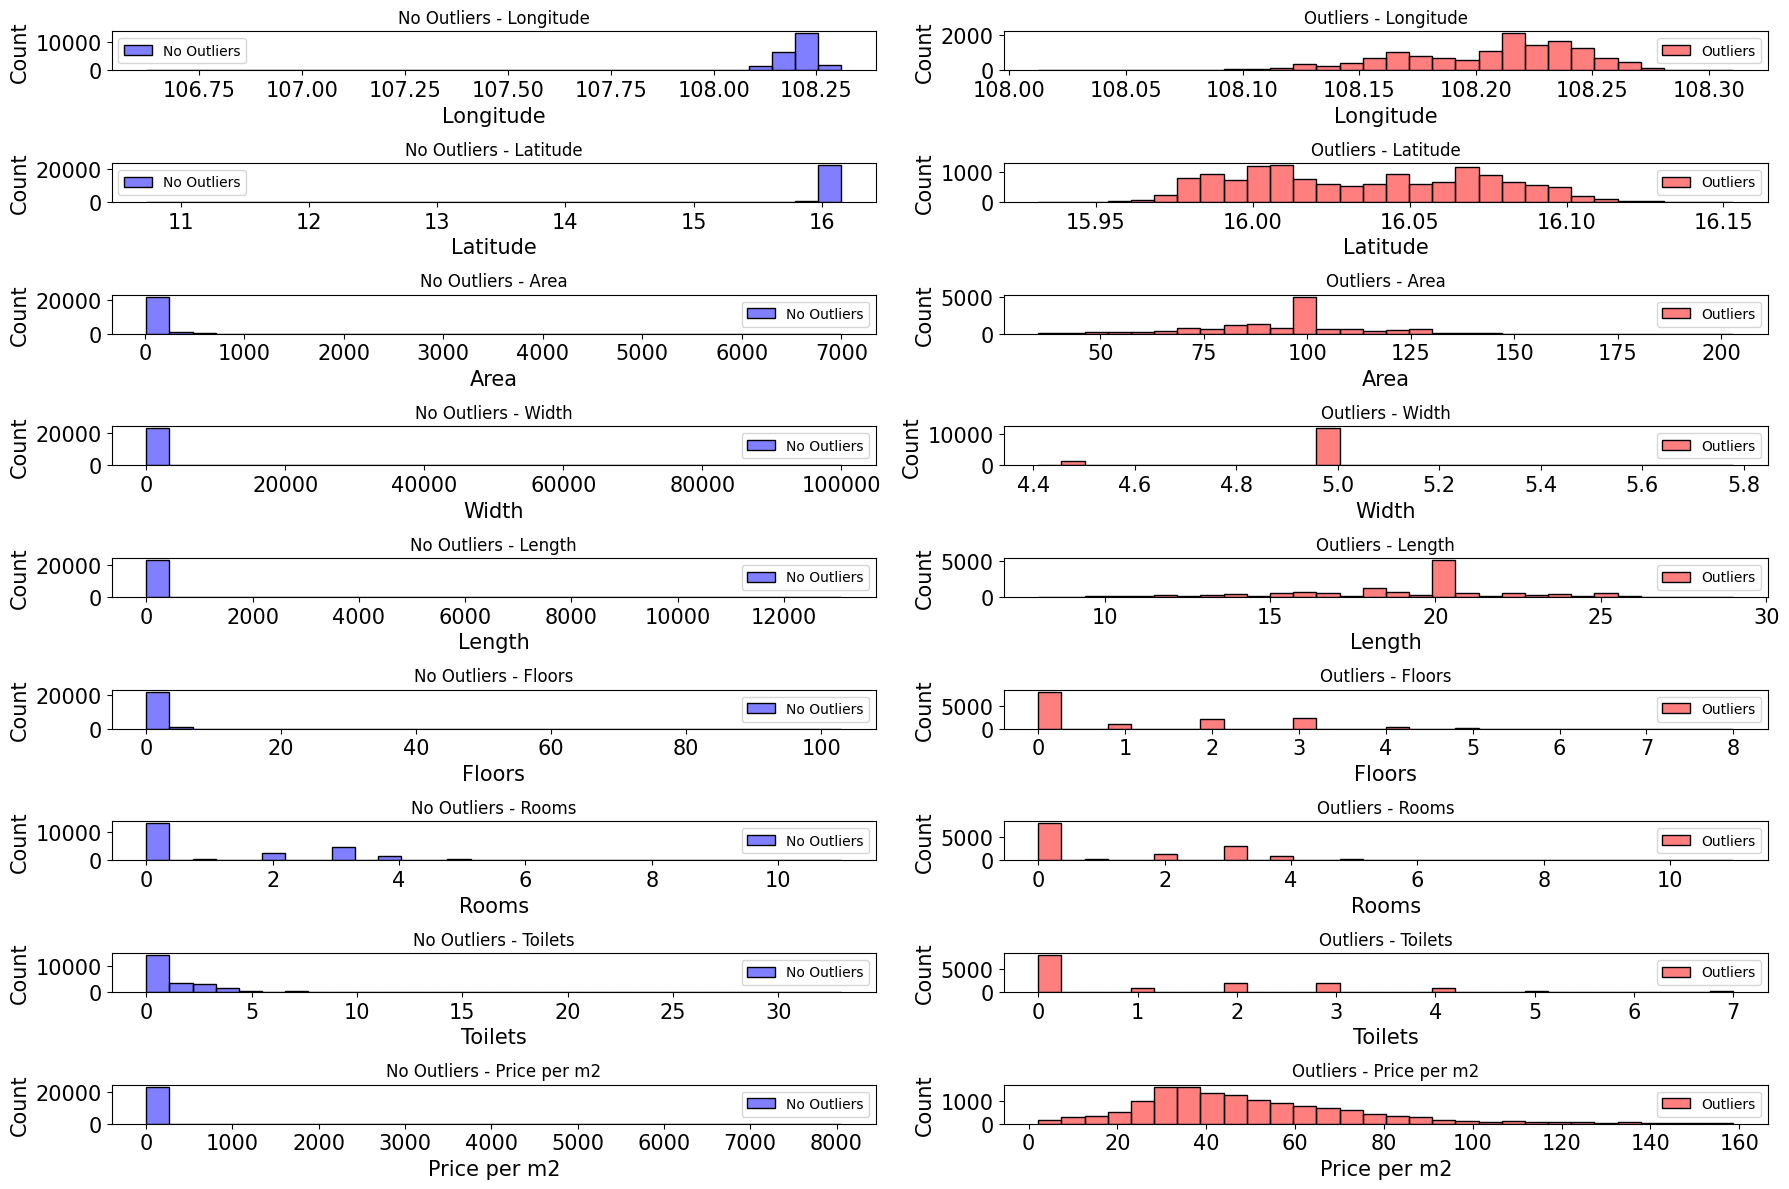

In [67]:
cols = ["Longitude","Latitude", "Area", "Width", "Length", "Floors", "Rooms", "Toilets", "Price per m2"]

plt.figure(figsize=(18, 12))
for i, col in enumerate(cols, 1):
    plt.subplot(9, 2, 2*i-1) 
    sns.histplot(data=df_noOutliers, x=col, bins=30, color='blue', alpha=0.5, label='No Outliers')
    plt.ylabel('Count', fontsize = 15)
    plt.xlabel(col, fontsize = 15)   
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15) 
    plt.title('No Outliers - ' + col)
    plt.legend()

    plt.subplot(9, 2, 2*i) 
    sns.histplot(data=df, x=col, bins=30, color='red', alpha=0.5, label='Outliers')
    plt.ylabel('Count', fontsize = 15)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15) 
    plt.title('Outliers - ' + col)
    plt.legend()

plt.tight_layout()
plt.show()

In [68]:
df.to_csv('CleanData.csv', index=False)

## Conclusion